In [1]:
# Scientific computing
import pandas as pd
import numpy as np
import scipy

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Inspect data

In [2]:
df_full = pd.read_csv('data/heart_2020_cleaned.csv')
print(df_full.info())
df_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


The dataset was cleaned, thanks to KAMIL PYTLAK.

In [5]:
# Number of features and instances
df_full.shape, df_full.columns.to_list()

((319795, 18),
 ['HeartDisease',
  'BMI',
  'Smoking',
  'AlcoholDrinking',
  'Stroke',
  'PhysicalHealth',
  'MentalHealth',
  'DiffWalking',
  'Sex',
  'AgeCategory',
  'Race',
  'Diabetic',
  'PhysicalActivity',
  'GenHealth',
  'SleepTime',
  'Asthma',
  'KidneyDisease',
  'SkinCancer'])

# Plans

### Mục tiêu:
- Phân tích được các yếu tố có thể liên quan đến tình trạng tim mạch của một người.
- Trực quan hóa các thông tin quan trọng
- Biến đổi data thành dạng dữ liệu thân thiện với học máy

### Thuộc tính đã có: có 17 thuộc tính độc lập:
- 'BMI': Continuous,
- 'Smoking': Categorical,
- 'AlcoholDrinking' : Categorical,
- 'Stroke': Categorical,
- 'PhysicalHealth': Continuous,
- 'MentalHealth': Continuous,
- 'DiffWalking': Categorical,
- 'Sex': Categorical,
- 'AgeCategory': Categorical,
- 'Race': Categorical,
- 'Diabetic': Categorical,
- 'PhysicalActivity': Categorical,
- 'GenHealth': Continuous,
- 'SleepTime': Continuous,
- 'Asthma': Categorical,
- 'KidneyDisease': Categorical,
- 'SkinCancer': Categorical

### Biến phụ thuộc:

1. Tình trạng mắc bệnh tim 'HeartDisease'.
2. Khả năng mắc bệnh tim, cách tiếp cận cần tính toán thêm dựa trên 'HeartDisease'

### Mô tả kế hoạch:

Đầu tiên tôi sẽ tìm hiểu một vài thông tin thống kê của dataset như tỷ lệ mắc bệnh tim chung, phân phối của các thuộc tính, phát hiện các vấn đề có thể không phù hợp như outlier

Tiếp theo, tôi sẽ tìm hiểu xem những yếu tố nào ảnh hưởng đến khả năng mắc bệnh tim của một người, từ đó có thể đưa ra các yếu tố giúp dự đoán khả năng này. Tôi sẽ dùng một số công cụ kiểm định thống kê, trực quan hóa cho mục đích trên.

Một vài thuộc tính có thể sẽ khó có sẵn khi vào thực tế, có thể chúng ta sẽ cần chọn lựa ra các thuộc tính thực sự có thể ứng dụng.

Cuối cùng, tôi sẽ biến đổi data cho phù hợp với việc sử dụng các thuật toán học máy. Như chúng ta thấy, rất nhiều cột dữ liệu được thể hiện dưới loại dữ liệu object, chúng ta cần biến đổi chúng thành kiểu dữ liệu mà các thuật toán học máy có thể hiểu. Đồng thời, đối với một số cột dữ liệu như BMI, sleep time, tôi sẽ sử dụng binning để vừa thuận tiện cho việc tìm hiểu mối tương quan, và cũng có thể cải thiện kết quả mô hình

Chúng ta sẽ đi qua các bước
1. Statistical Analysis
1. Feature Selection
1. Data Transformation

# Statistical analysis

In [3]:
df_full.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


## Distribution

In [5]:
cat_cols = []
num_cols = []
for col in df_full.columns:
    if df_full[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)
print('Number of categorical columns:', len(cat_cols))
print('Number of numerical columns:', len(num_cols))

Number of categorical columns: 14
Number of numerical columns: 4


In [31]:
def truncate_text(lenght = 8):
    def sub(label):
        if len(label.get_text()) > lenght:
            label.set_text(label.get_text()[:8]+'...')
        return label
    return sub
def create_figure(n_charts, n_cols = 2, ax_width = 5, ax_height = 5, **kwargs):
    n_rows = n_charts//n_cols + int(bool(n_charts%n_cols))
    return plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=(ax_width*n_cols, ax_height*n_rows),
        **kwargs)

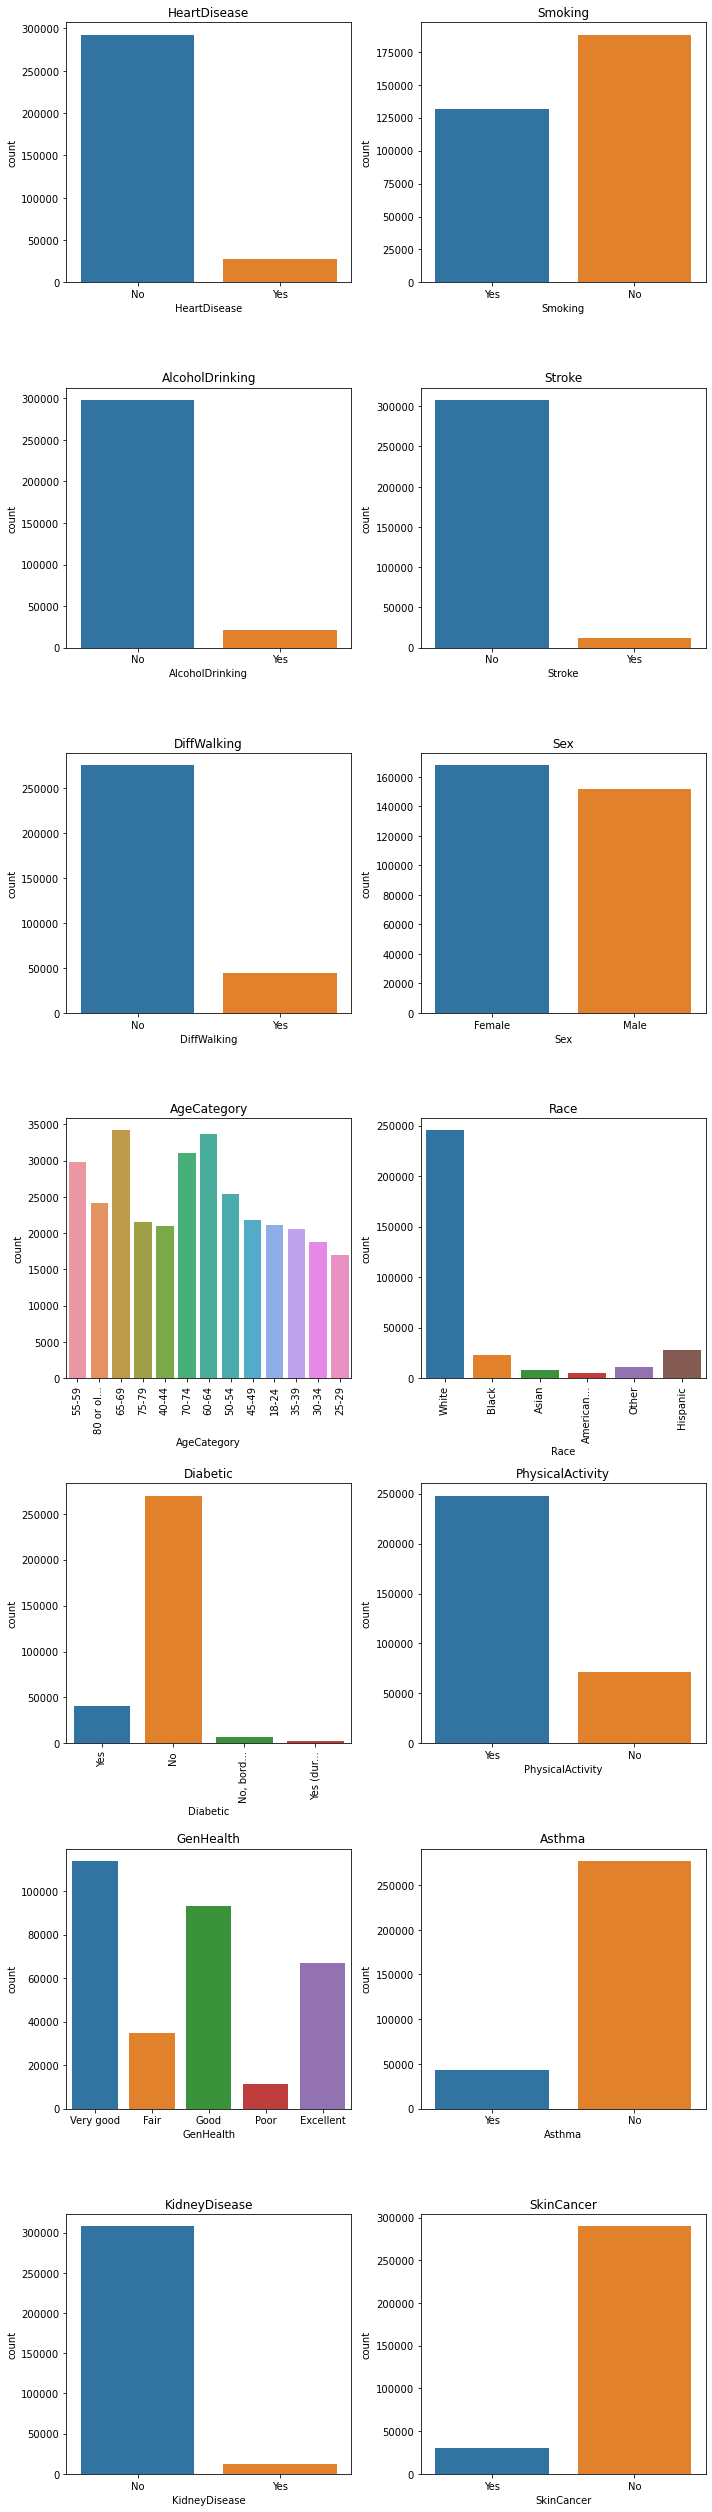

In [30]:
n_charts = len(cat_cols)
fig, ax = create_figure(n_charts)
for i, col in enumerate(cat_cols):
    sns.countplot(x=df_full[col], ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(col)
    if col in ['AgeCategory', 'Race', 'Diabetic']:
        labels = ax[i//2][i%2].get_xticklabels()
        labels = map(truncate_text(), labels)
        ax[i//2][i%2].set_xticklabels(labels = labels,rotation=90)
plt.tight_layout()

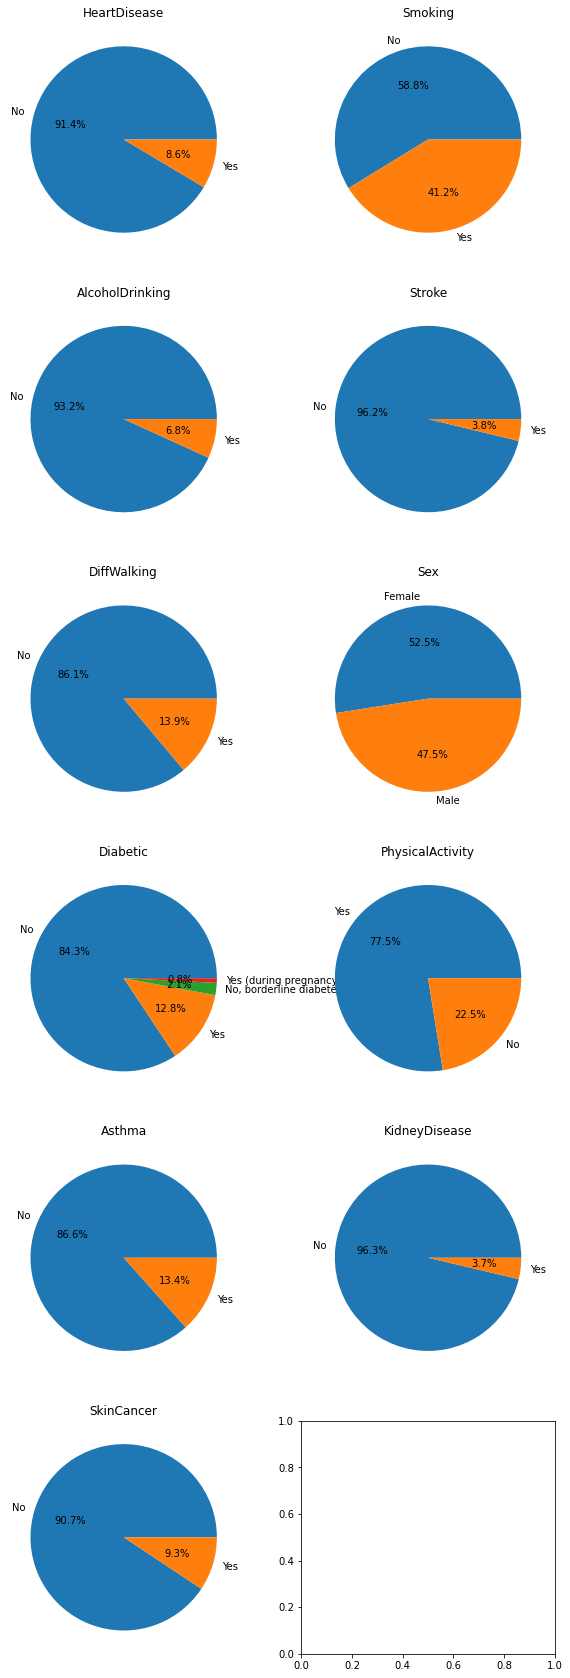

In [36]:
n_charts = 0
for col in cat_cols:
    if df_full[col].nunique() < 5:
        n_charts += 1
n_cols = 2
fig, ax = create_figure(n_charts, n_cols=n_cols)
i = 0
for col in cat_cols:
    if df_full[col].nunique() < 5:
        data = df_full[col].value_counts()
        ax[i//n_cols][i%n_cols].pie(data,labels=data.index, autopct='%1.1f%%')
        ax[i//n_cols][i%n_cols].set_title(col)
        i += 1

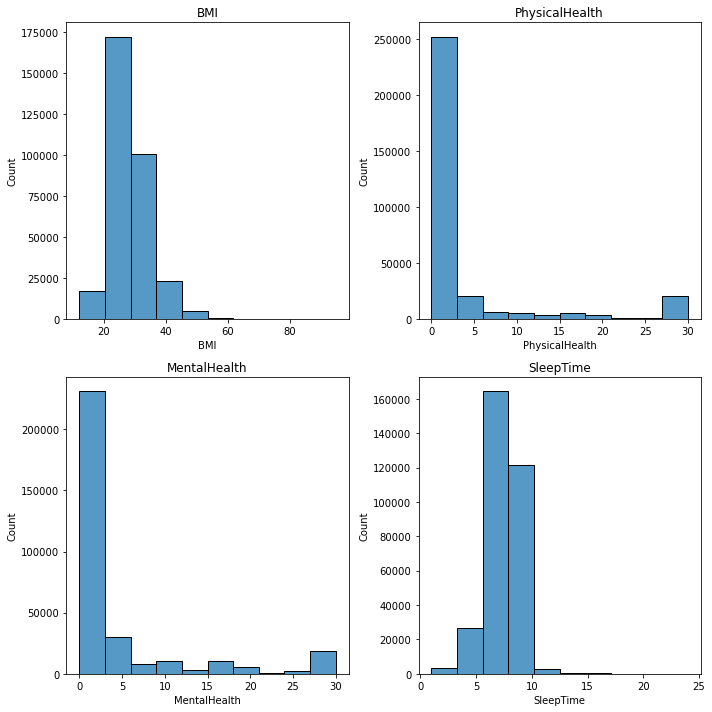

In [54]:
n_charts = len(num_cols)
fig, ax = create_figure(n_charts)
for i, col in enumerate(num_cols):
    sns.histplot(x=df_full[col],bins=10, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(col)
plt.tight_layout()

**Nhận xét:** các phân phối rất gần với dân số chung. Tuy nhiên, tỷ lệ người hút thuốc lại cao đột biến (41,2% so với 12.5% theo báo cáo của CDC Hoa Kỳ năm 2020). Chúng ta cần đặt ra câu hỏi tại sao có hiện tượng này và cẩn trọng khi áp dụng kết quả từ mô hình với dân số chung. Thêm nữa, vì cỡ mẫu của chúng ta cũng khá lớn, sự chênh lệch dù là nhỏ với phân phối của dân số chung cũng có ý nghĩa thống kê và cần được cân nhắc. 